# Backtesting trading strategies 


In [1]:
import numpy as np
import pandas as pd
import math
from datetime import timedelta 
import yfinance as yf
import talib
import plotly.graph_objects as go
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
%matplotlib inline 

In [ ]:
#Moving average
tesla_price = yf.download("TSLA", start="2020-01-02", end="2020-07-02", interval="1d")
tesla_price = tesla_price.reset_index() 
#tesla_price['Date'] = tesla_price['Date'].apply(mpl_dates.date2num)
tesla_price.loc[:, 'ma20'] = tesla_price.Close.rolling(20).mean()

In [ ]:
tesla_price.loc[:, "rsi"] = talib.RSI(tesla_price.Close, 14)

In [ ]:
#Plot figure 
fig = go.Figure(
    data=go.Ohlc(
        x=tesla_price.index,
        open=tesla_price["Open"],
        high=tesla_price["High"],
        low=tesla_price["Low"],
        close=tesla_price["Close"],
    )
)
fig.show()


### Dataset
Comprises the top 100 stocks in the S&P500 as of June 2021, and come from a variety of sectors as seen in the graph below. Stocks from the IT sector make up the majority of 24%.

In [ ]:
companies =['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','TSLA','BRK-B','NVDA','JPM','JNJ','V','UNH','PYPL','HD','PG','MA','DIS',
            'BAC','ADBE','XOM','CMCSA','NFLX','VZ','INTC','CRM','CSCO','PFE','KO','ABT','T','PEP','CVX','TMO','NKE','ABBV',
            'MRK','AVGO','WMT','ACN','WFC','LLY','TXN','COST','DHR','MCD','MDT','QCOM','PM','LIN','UPS','HON','BMY','UNP',
            'NEE','C','ORCL','AMGN','LOW','MS','INTU','SBUX','AMAT','IBM','BA','RTX','GS','AMT','BLK','TGT','CAT','GE','MMM',
            'NOW','CVS','SCHW','DE','ISRG','AMD','AXP','CHTR','SPGI','ANTM','LRCX','MU','LMT','PLD','ZTS','BKNG','FIS','MDLZ',
            'MO','GILD','SYK','CCI','TMUS','ADP','CI','PNC','TJX']

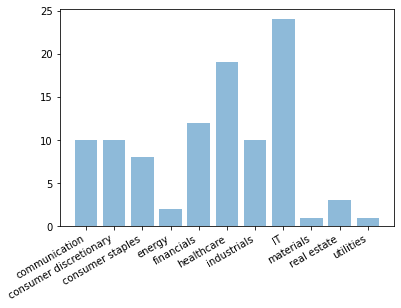

In [282]:
sector = ['communication','consumer discretionary', 'consumer staples','energy','financials','healthcare','industrials','IT',
          'materials','real estate','utilities']
objects = [10,10,8,2,12,19,10,24,1,3,1]
fig, ax = plt.subplots()
plt.bar(sector, objects, align='center', alpha=0.5)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

### MACD
Moving average convergence divergence

Basic strategy: A bullish signal is present when the MACD line crosses ABOVE the signal line and a bearish signal is present when the MACD line crosses BELOW the signal line.  

In-depth strategy: When the crossover takes place below the zero line, traders may look for confirmation of an upward trend by waiting for the MACD line to cross over the zero line before opening a long position. Likewise, when the crossover occurs above the zero line, confirmation can be seen when the MACD line crosses below the zero line.

From: https://www.dailyfx.com/education/moving-average-convergence-divergence/macd-crossover.html

In [ ]:
# MACD line: 12 day EMA – 26 day EMA 
# Signal line: 9 day EMA of MACD line
# MACD histogram: MACD line – signal line

#Strategy: A bullish signal is present when the MACD line crosses ABOVE the signal line and is below the zero line. 
# When the crossover takes place, traders may look for confirmation of an upward trend by waiting for the MACD line to cross 
# over the zero line before opening a long position. Likewise, a bearish signal is present when the MACD line crosses BELOW
# the signal line and is above the zero line. Again, confirmation can be seen when the MACD line crosses below the zero line.
# From: https://www.dailyfx.com/education/moving-average-convergence-divergence/macd-crossover.html

# Get support and resistance levels using fractals - candlestick pattern made by 5 candles. 
# From: https://github.com/gianlucamalato/machinelearning/blob/master/Support_and_resistance.ipynb

def isSupport(df,i):
    support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] \
  and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
    return support

def isResistance(df,i):
    resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] \
  and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2] 
    return resistance

levels = []
for i in range(2,tesla_price.shape[0]-2):
    if isSupport(tesla_price,i):
        levels.append((i,tesla_price['Low'][i]))
    elif isResistance(tesla_price,i):
        levels.append((i,tesla_price['High'][i]))
        



In [ ]:
def plot_all():
    fig, ax = plt.subplots()

    candlestick_ohlc(ax,tesla_price.values,width=0.6, colorup='green', colordown='red', alpha=0.8)

    date_format = mpl_dates.DateFormatter('%d %b %Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    for level in support:
        plt.hlines(level[1],xmin=tesla_price['Date'][level[0]],\
               xmax=max(tesla_price['Date']),colors='blue')
    for level in resistance:
        plt.hlines(level[1],xmin=tesla_price['Date'][level[0]],\
               xmax=max(tesla_price['Date']),colors='black')
    fig.show()
#support levels are blue and resistance levels are black

In [ ]:
s =  np.mean(tesla_price['High'] - tesla_price['Low'])

def isFarFromLevel(l):
    return np.sum([abs(l-x) < s  for x in levels]) == 0

support = []
resistance = []
levels = []
for i in range(2,tesla_price.shape[0]-2):
    if isSupport(tesla_price,i):
        l = tesla_price['Low'][i]
        if isFarFromLevel(l):
            levels.append((i,l))
            support.append((i,l))

    elif isResistance(tesla_price,i):
        l = tesla_price['High'][i]
        if isFarFromLevel(l):
            levels.append((i,l))
            resistance.append((i,l))
            


    

In [ ]:
plot_all()

In [ ]:
plt.bar(tesla_price['Date'],macd[2],color = 'r')


In [ ]:
#plot - NEED TO FIX DATE ON X AXIS 

#fig, ax = plt.subplots()
fig=plt.figure()
fig.add_subplot(211)
plt.bar(tesla_price['Date'],macd[2],color = 'r')
#date_format = mpl_dates.DateFormatter('%d %b %Y')
#ax.xaxis.set_major_formatter(date_format)
#fig.autofmt_xdate()
plt.axhline(y=0.5, color='b', linestyle='-')

plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.xlabel('')
plt.title('MACD Oscillator')


fig.add_subplot(212)

macd[0].plot(label='ma1')
macd[1].plot(label='ma2',linestyle=':')
    
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
timeframe = {'1m':'5m'}
timeframe['1m']

In [77]:
# Using higher timeframe 
# Function that takes in the security, no. of days for moving avg to calculate profit
# and returns strategy performance for max of last 10 years 
def MACD(security, days):
    #timeframe_dict = {'1m':'5m','2m':'15m','5m':'30m','15m':'1h','30m':'1h','60m':'1d','90m':'1d','1h':'1d','1d':'1wk','5d':'1mo','1wk':'1mo','1mo':'3mo'}
    security_price = yf.download(security, period = '10y', interval='1wk')
    security_price = security_price.dropna()
    security_price = security_price.reset_index() 
    if security_price['Date'].iloc[-1] == security_price['Date'].iloc[-2]:
        security_price = security_price.drop(len(price_df)-1)
    security_short = yf.download(security, period = '10y', interval='1d')
    security_short = security_short.dropna()
    security_short = security_short.reset_index()
    macd = talib.MACD(security_price['Close'], fastperiod=12, slowperiod=26, signalperiod=9) #macd line, signal line, macd histogram
    diff = macd[2].tolist() 
    macdline = macd[0].tolist()
    
    # 1) Buy when macd line is above signal line, sell when macd line is below signal line
    
    #find start point where macd histogram starts
    for i in range(len(diff)):
        if math.isnan(diff[i])!= True:
            start = i
            break 
    diff = diff[i:]

    #find all crossover points which returns the index, value, and whether to short (0) or long (1) 
    crossover_list = []
    def crossover(vals):
        if len(vals) == 1:
            return vals[0]
        else:
            cross = crossover(vals[1:])
            if cross < 0 and vals[0] > 0: #0 for short
                crossover_list.append((len(macd[2])-len(vals)+1,cross,0))
            elif cross > 0 and vals[0] < 0: #1 for long
                crossover_list.append((len(macd[2])-len(vals)+1,cross,1))
            return vals[0]
        
    crossover(diff)
    crossover_list.sort()

    # 2) bullish crossover (if crossover happened below 0, then buy when macd line crosses above 0 and vice versa)
    crossover_list2 = [] # returns index of crossover, index of macd line crossing above/below 0, macd line 
    for i in range(len(crossover_list)):
        if crossover_list[i][1]>0 and macdline[crossover_list[i][0]] < 0: #crossover from negative to positive macd histogram, and below 0
            try:
                index = -1
                for j in macdline[crossover_list[i][0]:]:
                    index += 1
                    if j > 0:
                        crossover_list2.append((crossover_list[i][0],crossover_list[i][0]+index,j,crossover_list[i][2]))
                        break
            except:
                pass
        elif crossover_list[i][1]<0 and macdline[crossover_list[i][0]] > 0:
            try:
                index = -1
                for j in macdline[crossover_list[i][0]:]:
                    index += 1
                    if j < 0:
                        crossover_list2.append((crossover_list[i][0],crossover_list[i][0]+index,j,crossover_list[i][2]))
                        break
            except:
                pass
    # remove duplicates as bullish crossover may be at the same point for several crossovers in crossover_list (for part 1)
    remove_list = [] 
    for i in range(len(crossover_list2[:-1])):
        dupe = crossover_list2[i][1]
        if crossover_list2[i+1][1] == dupe:
            remove_list.append(i+1)
    for i in sorted(remove_list,reverse=True):
        crossover_list2.pop(i)
        
    #create df to store primary results
    col = ['Date', 'Price', 'Strategy', 'MA'+str(days), 'Max/Min price','Profit']
    MACD_df = pd.DataFrame(columns = col)

    for i in range(len(crossover_list)):
        date = security_price['Date'].iloc[crossover_list[i][0]]
        index = security_short.index[security_short['Date'] == date].tolist() #compare back with shorter timeframe prices
        count = 0
        while len(index) == 0: #when shorter timeframe df does not contain date in higher timeframe 
            date_short = date + timedelta(days=1) 
            index = security_short.index[security_short['Date'] == date_short].tolist()
            count += 1
            if count > 5: #asssume that after adding 5 days and still shorter timeframe has no date, then use last date on shorter timeframe
                index = [-1]
                break 
                
        price = security_price['Close'].iloc[crossover_list[i][0]]
        strategy = crossover_list[i][2]
        if strategy == 0:
            try:
                max_min_price = min(security_short['Close'].iloc[index[0]:index[0]+days])
            except:
                #max_min_price = 0
                max_min_price = min(security_short['Close'].iloc[index[0]:])
        else:
            try:
                max_min_price = max(security_short['Close'].iloc[index[0]:index[0]+days])
            except:
                max_min_price = 0
                #max_min_price = max(security_short['Close'].iloc[index[0]:])

        try: 
            ma = talib.SMA(security_short['Close'],timeperiod=days)[index[0]+days] #moving avg
        except:
            ma = security_short['Close'].iloc[-1] #if not enough time to calculate moving avg, get the last value 
        
        if ma > price and strategy == 1:
            profit = 1
        elif ma < price and strategy == 0:
            profit = 1 
        else:
            profit = 0 
        series = pd.Series([date,price,strategy,ma,max_min_price,profit], index = col)
        MACD_df = MACD_df.append(series,ignore_index = True)

    #create df to store secondary results
    MACD_df2 = pd.DataFrame(columns = col)

    for i in range(len(crossover_list2)):
        date = security_price['Date'].iloc[crossover_list2[i][1]]
        index = security_short.index[security_short['Date'] == date].tolist()
        while len(index) == 0: #when shorter timeframe df does not contain date in higher timeframe 
            date_short = date + timedelta(days=1) 
            index = security_short.index[security_short['Date'] == date_short].tolist()
            count += 1
            if count > 5: #asssume that after adding 5 days and still shorter timeframe has no date, then use last date on shorter timeframe
                index = [-1]
                break 
        price = security_price['Close'].iloc[crossover_list2[i][1]]
        strategy = crossover_list2[i][3]
        if strategy == 0:
            try:
                max_min_price = min(security_short['Close'].iloc[index[0]:index[0]+days])
            except:
                max_min_price = min(security_short['Close'].iloc[index[0]:])
        else:
            try:
                max_min_price = max(security_short['Close'].iloc[index[0]:index[0]+days])
            except:
                max_min_price = max(security_short['Close'].iloc[index[0]:])
            
        try: 
            ma = talib.SMA(security_short['Close'],timeperiod=days)[index[0]+days]
        except:
            ma = security_short['Close'].iloc[-1]
        
        if ma > price and strategy == 1:
            profit = 1
        elif ma < price and strategy == 0:
            profit = 1 
        else:
            profit = 0 
        series = pd.Series([date,price,strategy,ma,max_min_price,profit], index = col)
        MACD_df2 = MACD_df2.append(series,ignore_index = True)
    return (MACD_df,MACD_df2)


In [3]:
def MACD_same(security, days, timeframe):
    #timeframe_dict = {'1m':'5m','2m':'15m','5m':'30m','15m':'1h','30m':'1h','60m':'1d','90m':'1d','1h':'1d','1d':'1wk','5d':'1mo','1wk':'1mo','1mo':'3mo'}
    security_price = yf.download(security, period = '10y', interval=timeframe)
    security_price = security_price.dropna()
    security_price = security_price.reset_index() 
    macd = talib.MACD(security_price['Close'], fastperiod=12, slowperiod=26, signalperiod=9) #macd line, signal line, macd histogram
    diff = macd[2].tolist() 
    macdline = macd[0].tolist()
    
    # 1) Buy when macd line is above signal line, sell when macd line is below signal line
    
    #find start point where macd histogram starts
    for i in range(len(diff)):
        if math.isnan(diff[i])!= True:
            start = i
            break 
    diff = diff[i:]

    #find all crossover points which returns the index, value, and whether to short (0) or long (1) 
    crossover_list = []
    def crossover(vals):
        if len(vals) == 1:
            return vals[0]
        else:
            cross = crossover(vals[1:])
            if cross < 0 and vals[0] > 0: #0 for short
                crossover_list.append((len(macd[2])-len(vals)+1,cross,0))
            elif cross > 0 and vals[0] < 0: #1 for long
                crossover_list.append((len(macd[2])-len(vals)+1,cross,1))
            return vals[0]
        
    crossover(diff)
    crossover_list.sort()

    # 2) bullish crossover (if crossover happened below 0, then buy when macd line crosses above 0 and vice versa)
    crossover_list2 = [] # returns index of crossover, index of macd line crossing above/below 0, macd line 
    for i in range(len(crossover_list)):
        if crossover_list[i][1]>0 and macdline[crossover_list[i][0]] < 0: #crossover from negative to positive macd histogram, and below 0
            try:
                index = -1
                for j in macdline[crossover_list[i][0]:]:
                    index += 1
                    if j > 0:
                        crossover_list2.append((crossover_list[i][0],crossover_list[i][0]+index,j,crossover_list[i][2]))
                        break
            except:
                pass
        elif crossover_list[i][1]<0 and macdline[crossover_list[i][0]] > 0:
            try:
                index = -1
                for j in macdline[crossover_list[i][0]:]:
                    index += 1
                    if j < 0:
                        crossover_list2.append((crossover_list[i][0],crossover_list[i][0]+index,j,crossover_list[i][2]))
                        break
            except:
                pass
    # remove duplicates as bullish crossover may be at the same point for several crossovers in crossover_list (for part 1)
    remove_list = [] 
    for i in range(len(crossover_list2[:-1])):
        dupe = crossover_list2[i][1]
        if crossover_list2[i+1][1] == dupe:
            remove_list.append(i+1)
    for i in sorted(remove_list,reverse=True):
        crossover_list2.pop(i)
        
    #create df to store primary results
    col = ['Date', 'Price', 'Strategy', 'MA'+str(days), 'Max/Min price','Profit']
    MACD_df = pd.DataFrame(columns = col)

    for i in range(len(crossover_list)):
        date = security_price['Date'].iloc[crossover_list[i][0]]
        price = security_price['Close'].iloc[crossover_list[i][0]]
        strategy = crossover_list[i][2]
        if strategy == 0:
            try:
                max_min_price = min(security_price['Close'].iloc[crossover_list[i][0]:crossover_list[i][0]+days])
            except:
                max_min_price = min(security_price['Close'].iloc[crossover_list[i][0]:])
        else:
            try:
                max_min_price = max(security_price['Close'].iloc[crossover_list[i][0]:crossover_list[i][0]+days])
            except:
                max_min_price = max(security_price['Close'].iloc[crossover_list[i][0]:])
                

        try: 
            ma = talib.SMA(security_price['Close'],timeperiod=days)[crossover_list[i][0]+days] #moving avg
        except:
            ma = security_price['Close'].iloc[-1] #if not enough time to calculate moving avg, get the last value 
        
        if ma > price and strategy == 1:
            profit = 1
        elif ma < price and strategy == 0:
            profit = 1 
        else:
            profit = 0 
        series = pd.Series([date,price,strategy,ma,max_min_price,profit], index = col)
        MACD_df = MACD_df.append(series,ignore_index = True)

    #create df to store secondary results
    MACD_df2 = pd.DataFrame(columns = col)

    for i in range(len(crossover_list2)):
        date = security_price['Date'].iloc[crossover_list2[i][1]]
        price = security_price['Close'].iloc[crossover_list2[i][1]]
        strategy = crossover_list2[i][3]
        if strategy == 0:
            try:
                max_min_price = min(security_price['Close'].iloc[crossover_list2[i][0]:crossover_list2[i][0]+days])
            except:
                max_min_price = min(security_price['Close'].iloc[crossover_list2[i][0]:])
        else:
            try:
                max_min_price = max(security_price['Close'].iloc[crossover_list2[i][0]:crossover_list2[i][0]+days])
            except:
                max_min_price = max(security_price['Close'].iloc[crossover_list2[i][0]:])
            
        try: 
            ma = talib.SMA(security_price['Close'],timeperiod=days)[crossover_list2[i][0]+days]
        except:
            ma = security_price['Close'].iloc[-1]
        
        if ma > price and strategy == 1:
            profit = 1
        elif ma < price and strategy == 0:
            profit = 1 
        else:
            profit = 0 
        series = pd.Series([date,price,strategy,ma,max_min_price,profit], index = col)
        MACD_df2 = MACD_df2.append(series,ignore_index = True)
    return (MACD_df,MACD_df2)


### Visualize the strategy

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


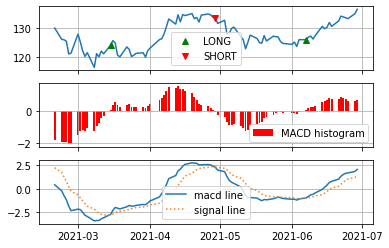

In [37]:
def MACD_plot(df,ticker):
    price_df1 = yf.download(ticker, start="2021-01-01", end="2021-06-30", interval='1d')
    price_df = price_df1.dropna().reset_index()
    price_df = price_df.loc[33:].reset_index()
    fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,sharex=True)
    ax1.plot(price_df['Date'],price_df['Close'])
    
    #long positions
    list_date = df.loc[df['Strategy']==1]['Date']
    index_list = []
    for i in list_date:
        index_list.append(price_df.loc[price_df['Date']==i].index) 
    while len(index_list[0]) == 0:
        index_list.pop(0)
    long = pd.DataFrame(columns = price_df.columns)
    for i in index_list:
        long = long.append(price_df.iloc[i])
    ax1.plot(long['Date'],long['Close'],label='LONG',lw=0,marker='^',c='g')
    
    #short positions
    list_date = df.loc[df['Strategy']==0]['Date']
    index_list = []
    for i in list_date:
        index_list.append(price_df.loc[price_df['Date']==i].index) 
    while len(index_list[0]) == 0:
        index_list.pop(0)
    short = pd.DataFrame(columns = price_df.columns)
    for i in index_list:
        short = short.append(price_df.iloc[i])
    ax1.plot(short['Date'],short['Close'], label='SHORT',lw=0,marker='v',c='r')
    ax1.legend(loc='best')
    ax1.grid(True)
    monthly = mdates.MonthLocator(interval=1)
    ax1.xaxis.set_major_locator(monthly) #set x-axis to monthly ticks
    
    #MACD oscillation
    macd = talib.MACD(price_df1['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    #price_df['macd'].plot(kind='bar',color='r')
    ax2.bar(price_df['Date'],macd[2][33:],color='r',label='MACD histogram')
    ax2.legend(loc='best')
    ax2.grid(True)
    ax2.xaxis.set_major_locator(monthly)
    
    #macd line and signal line
    ax3.plot(macd[0][33:],label = 'macd line')
    ax3.plot(macd[1][33:],label = 'signal line', linestyle = ':')
    ax3.grid(True)
    ax3.legend(loc='best')
    ax3.xaxis.set_major_locator(monthly)

df = MACD_same('AAPL',21,'1d')[0]
MACD_plot(df,'AAPL')

### Results

In [37]:
# Results for same trading timeframe 
itlist = ['AAPL','MSFT','V','NVDA','MA','PYPL','ADBE','INTC', 'ORCL','CSCO','CRM','ACN','AVGO','TXN','QCOM','IBM','AMAT','INTU',
         'AMD','NOW','FIS','MU','LRCX','ADP','FISV','ADSK','ADI','GPN','NXPI','KLAC']
it_dict = {}
for i in itlist:
    it_dict[i] = MACD_same(i,21,'1d')
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [135]:
companies =['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','TSLA','BRK-B','NVDA','JPM','JNJ','V','UNH','PYPL','HD','PG','MA','DIS',
            'BAC','ADBE','XOM','CMCSA','NFLX','VZ','INTC','CRM','CSCO','PFE','KO','ABT','T','PEP','CVX','TMO','NKE','ABBV',
            'MRK','AVGO','WMT','ACN','WFC','LLY','TXN','COST','DHR','MCD','MDT','QCOM','PM','LIN','UPS','HON','BMY','UNP',
            'NEE','C','ORCL','AMGN','LOW','MS','INTU','SBUX','AMAT','IBM','BA','RTX','GS','AMT','BLK','TGT','CAT','GE','MMM',
            'NOW','CVS','SCHW','DE','ISRG','AMD','AXP','CHTR','SPGI','ANTM','LRCX','MU','LMT','PLD','ZTS','BKNG','FIS','MDLZ',
            'MO','GILD','SYK','CCI','TMUS','ADP','CI','PNC','TJX']
macd_dict = {}
for i in companies:
    macd_dict[i] = MACD_same(i,21,'1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [136]:
# Results for higher timeframe
macd_dict_high = {}
for i in companies:
    macd_dict_high[i] = MACD(i,21)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [147]:
#function to get results
def MACD_results(df):
    total_trades = len(df)
    win_rate = df['Profit'].sum()/total_trades*100
    total_profit = 0
    avg_price = df.columns[3]
    for i in range(len(df)):
        if df['Strategy'].iloc[i] == 0:
            profit = (df['Price'].iloc[i]-df[avg_price].iloc[i])/df[avg_price].iloc[i]*100
        else:
            profit = (df[avg_price].iloc[i]-df['Price'].iloc[i])/df['Price'].iloc[i]*100
        total_profit += profit
    avg_profit = total_profit/total_trades
    return [total_trades,win_rate,avg_profit]

macd_results = {}
for i in macd_dict:
    macd_results[i] = [MACD_results(macd_dict[i][0])]
    macd_results[i].append(MACD_results(macd_dict[i][1])) 
    
macd_results_high = {}
for i in macd_dict_high:
    macd_results_high[i] = [MACD_results(macd_dict_high[i][0])]
    macd_results_high[i].append(MACD_results(macd_dict_high[i][1])) 
#results show the total trades, win rate, avg profit for using the higher timeframe with the basic and strict results. 

In [184]:
macd_results_high['AAPL']

[[40, 47.5, 0.15697162065992312], [6, 50.0, 0.7220310330356566]]

In [181]:
def final_result_macd(result_list):
    totaltrades,winrate,avgprofit = 0,0,0
    totaltrades_strict,winrate_strict,avgprofit_strict = 0,0,0
    for i in companies:
        totaltrades += result_list[i][0][0]
        winrate += result_list[i][0][1]
        avgprofit += result_list[i][0][2]
        totaltrades_strict += result_list[i][1][0]
        winrate_strict += result_list[i][1][1]
        avgprofit_strict += result_list[i][1][2]
    total = len(result_list)
    return([totaltrades/total,winrate/total,avgprofit/total],
           [totaltrades_strict/total,winrate_strict/total,avgprofit_strict/total])


In [182]:
final_result_macd(macd_results)

([198.07, 49.79403669277616, 0.09330117370074582],
 [64.38, 36.40355818238003, 0.18755961271833255])

In [185]:
final_result_macd(macd_results_high)
#higher timeframe results

([42.37, 46.604881956345515, -0.22282364256074683],
 [11.2, 44.2805335230645, -0.44653356145035855])

### Moving average

200 day MA	

Price above 200MA - Long; price below 200MA - Short

In [ ]:
# Compare to 21MA to see if trade is profitable 
for i in range(len(security_price)):
        if security_price['Close'].iloc[i] > security_price['movingavg'].iloc[i]:
            buysell.append(1) #1 for buy 
        elif security_price['Close'].iloc[i] < security_price['movingavg'].iloc[i]:
             buysell.append(0) #0 for sell
        else:
            buysell.append('NaN')
    security_price['buy/sell'] = buysell
    security_price['21ma'] = talib.SMA(security_price['Close'],timeperiod=21)
    
    tradelist = []
    for i in range(len(security_price[:-21])):# void the last 21 trades as not enough time to measure 21MA. 
        ma = security_price['21ma'].iloc[i+21] 
        if security_price['buy/sell'].iloc[i] == 1:
            if ma > security_price['Close'].iloc[i]:
                winlose = 1
            else:
                winlose = 0
            profit = (ma - security_price['Close'].iloc[i])/security_price['Close'].iloc[i]*100
            tradelist.append((security_price['Date'].iloc[i], security_price['Date'].iloc[i+21], 1, winlose,profit))
        elif security_price['buy/sell'].iloc[i] == 0:
            if ma < security_price['Close'].iloc[i]:
                winlose = 1
            else:
                winlose = 0
            profit = (security_price['Close'].iloc[i] - ma)/ma*100
            tradelist.append((security_price['Date'].iloc[i], security_price['Date'].iloc[i+21], 0, winlose,profit))

In [174]:
def movingavg(security):
    security_price = yf.download(security, period = '10y', interval='1d')
    security_price = security_price.dropna()
    security_price = security_price.reset_index() 
    security_price['movingavg'] = talib.SMA(security_price['Close'], timeperiod=200) #200MA
    buysell = []
    for i in range(len(security_price)):
        if security_price['Close'].iloc[i] > security_price['movingavg'].iloc[i]:
            buysell.append(1) #1 for buy 
        elif security_price['Close'].iloc[i] < security_price['movingavg'].iloc[i]:
             buysell.append(0) #0 for sell
        else:
            buysell.append('NaN')
    security_price['buy/sell'] = buysell
    security_price['21ma'] = talib.SMA(security_price['Close'],timeperiod=21)
    
    tradelist = []
    for i in range(len(security_price)):
        if security_price['buy/sell'].iloc[i] == 1:
            for j in range(len(security_price['buy/sell'].iloc[i:])):
                if security_price['buy/sell'].iloc[i+j] == 0:
                    if security_price['Close'].iloc[i+j] > security_price['Close'].iloc[i]:
                        winlose = 1 
                    else:
                        winlose = 0
                    profit = (security_price['Close'].iloc[i+j] - security_price['Close'].iloc[i])/security_price['Close'].iloc[i]*100
                    tradelist.append((security_price['Date'].iloc[i], security_price['Date'].iloc[i+j], 1, winlose,profit))
                    break
        elif security_price['buy/sell'].iloc[i] == 0:
            for j in range(len(security_price['buy/sell'].iloc[i:])):
                if security_price['buy/sell'].iloc[i+j] == 1:
                    if security_price['Close'].iloc[i+j] < security_price['Close'].iloc[i]:
                        winlose = 1 
                    else:
                        winlose = 0
                    profit = (security_price['Close'].iloc[i] - security_price['Close'].iloc[i+j])/security_price['Close'].iloc[i+j]*100
                    tradelist.append((security_price['Date'].iloc[i], security_price['Date'].iloc[i+j], 0, winlose,profit))
                    break
    return tradelist #returns start end date of trade, long(1)/short(0), win(1)/lose(0), profit 

def ma_result(df):
    results = []
    totaltrades = len(df)
    winrate = 0
    avgprofit = 0
    for i in range(len(df)):
        winrate += df[i][3]
        avgprofit += df[i][4]
    winrate = winrate/totaltrades*100
    avgprofit = avgprofit/totaltrades
    results.append((totaltrades,winrate,avgprofit))
    return results
    #return total trades, win rate, avg profit


### Visualize the strategy
- Price above 200MA = Long
- Price below 200MA = Short

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


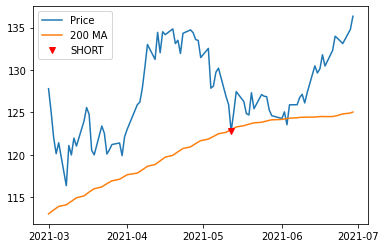

In [124]:
def MA_plot(ticker):
    price_df = yf.download(ticker, start="2021-03-01", end="2021-06-30", interval='1d')
    price_df = price_df.dropna().reset_index()
    price_df1 = yf.download(ticker, start="2020-03-01", end="2021-06-30", interval='1d')
    price_df1 = price_df1.dropna().reset_index()
    #plot price
    fig, ax = plt.subplots()
    ax.plot(price_df['Date'],price_df['Close'],label = 'Price')
    #plot 200MA
    price_df1['MA'] = talib.SMA(price_df1['Close'], timeperiod=200)
    price_df1 = price_df1[251:]
    ax.plot(price_df1['Date'],price_df1['MA'],label='200 MA')
    #plot short positions
    avg = movingavg('AAPL')
    avg = avg[-100:]
    short_date = []
    short = pd.DataFrame(columns = price_df.columns)
    for i in range(len(avg)):
        if avg[i][2] == 0:
            short_date.append(avg[i][0])
    for i in short_date:
        short = short.append(price_df[price_df['Date']==i])
    ax.plot(short['Date'],short['Close'], label='SHORT',lw=0,marker='v',c='r')
    monthly = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(monthly)
    ax.legend()
MA_plot('AAPL')

### Results

In [175]:
#returns the avg trades,winrate,profits of the top 100 companies in the S&P500
def ma_summary(companylist):
    result_list = []
    for i in companylist:
        result_list.append(ma_result(movingavg(i)))
    return result_list
MAresult = ma_summary(companies)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [176]:
def final_result(result_list):
    totaltrades,winrate,avgprofit = 0,0,0
    for i in range(len(result_list)):
        totaltrades += result_list[i][0][0]
        winrate += result_list[i][0][1]
        avgprofit += result_list[i][0][2]
    total = len(result_list)
    return(totaltrades/total,winrate/total,avgprofit/total)
final_result(MAresult)

(2159.17, 33.177100405464984, 4.872507761035617)

### Result summary 
Strategies are backtested on the top 100 companies in the S&P500 index
https://www.slickcharts.com/sp500

In [134]:
companies =['AAPL','MSFT','AMZN','FB','GOOGL','GOOG','TSLA','BRK-B','NVDA','JPM','JNJ','V','UNH','PYPL','HD','PG','MA','DIS',
            'BAC','ADBE','XOM','CMCSA','NFLX','VZ','INTC','CRM','CSCO','PFE','KO','ABT','T','PEP','CVX','TMO','NKE','ABBV',
            'MRK','AVGO','WMT','ACN','WFC','LLY','TXN','COST','DHR','MCD','MDT','QCOM','PM','LIN','UPS','HON','BMY','UNP',
            'NEE','C','ORCL','AMGN','LOW','MS','INTU','SBUX','AMAT','IBM','BA','RTX','GS','AMT','BLK','TGT','CAT','GE','MMM',
            'NOW','CVS','SCHW','DE','ISRG','AMD','AXP','CHTR','SPGI','ANTM','LRCX','MU','LMT','PLD','ZTS','BKNG','FIS','MDLZ',
            'MO','GILD','SYK','CCI','TMUS','ADP','CI','PNC','TJX']


100

In [102]:
ma_result(movingavg("MSFT"))


[*********************100%***********************]  1 of 1 completed


[('total_trades: 1998',
  'winrate: 51.25125125125125',
  'avgprofit: 11.08878543302006')]

In [82]:
apple.iloc[198:208]

,Date,Open,High,Low,Close,Adj Close,Volume,movingavg,buy/sell
198,2012-04-10,22.854643,23.000000,22.357143,22.444286,19.299906,889725200,NaN,NaN
199,2012-04-11,22.721430,22.745358,22.262142,22.364286,19.231110,696614800,15.355200,1
200,2012-04-12,22.321428,22.547501,22.160713,22.241785,19.125774,614336800,15.407116,1
201,2012-04-13,22.289642,22.310715,21.553928,21.615356,18.587103,859644800,15.455325,1
202,2012-04-16,21.787857,21.795713,20.651787,20.718929,17.816267,1050786800,15.499270,1
203,2012-04-17,20.676430,21.785713,20.425358,21.775000,18.724384,1025528000,15.548204,1
204,2012-04-18,21.918571,22.151787,21.525356,21.726429,18.682621,954531200,15.595539,1
205,2012-04-19,21.436428,21.597500,20.875713,20.980000,18.040760,834719200,15.638041,1
206,2012-04-20,21.120714,21.236429,20.372143,20.463572,17.596685,1030985200,15.677545,1
207,2012-04-23,20.378929,20.595358,19.879286,20.417856,17.557369,966529200,15.715848,1


### Pattern recognition 

### Hammer candlestick pattern
A hammer is a price pattern in candlestick charting that occurs when a security trades significantly lower than its opening, but rallies within the period to close near opening price. This pattern forms a hammer-shaped candlestick, in which the lower shadow is at least twice the size of the real body. Indicates a bullish reversal. 

In [225]:
# Hammer (0 = not hammer, 100= hammer)
def hammer(security):
    security_price = yf.download(security, period = '10y', interval='1d')
    security_price = security_price.dropna().reset_index()
    security_price['21ma'] = talib.SMA(security_price['Close'],timeperiod=21) 
    hammer_list = talib.CDLHAMMER(security_price['Open'], security_price['High'], security_price['Low'], security_price['Close'])
    tradelist = []
    for i in range(len(security_price[:-21])): # void the last 21 trades as not enough time to measure 21MA. 
        if hammer_list[i] == 100:
            ma = security_price['21ma'].iloc[i+21]
            if ma > security_price['Close'].iloc[i]:
                winlose = 1
            else:
                winlose = 0
            date = security_price['Date'].iloc[i]
            profit = (ma-security_price['Close'].iloc[i])/security_price['Close'].iloc[i]*100
            tradelist.append((date,winlose,profit))
    return tradelist
            
abc = hammer('AAPL')
abc

[*********************100%***********************]  1 of 1 completed


[(Timestamp('2011-09-26 00:00:00'), 0, -2.0267951265672863),
 (Timestamp('2011-11-07 00:00:00'), 0, -4.282527975171934),
 (Timestamp('2012-04-27 00:00:00'), 0, -6.4211442189455665),
 (Timestamp('2012-05-25 00:00:00'), 1, 2.196293457528648),
 (Timestamp('2012-06-22 00:00:00'), 1, 2.682244000358029),
 (Timestamp('2012-08-28 00:00:00'), 1, 0.8078576702328089),
 (Timestamp('2012-09-20 00:00:00'), 0, -6.398004239775512),
 (Timestamp('2013-04-05 00:00:00'), 1, 0.01709973423977057),
 (Timestamp('2013-08-08 00:00:00'), 1, 7.151684265333536),
 (Timestamp('2013-08-22 00:00:00'), 0, -3.9046889924863417),
 (Timestamp('2013-09-27 00:00:00'), 1, 3.786342145495922),
 (Timestamp('2013-11-01 00:00:00'), 1, 1.5495433168577724),
 (Timestamp('2013-12-18 00:00:00'), 0, -0.18095588279701977),
 (Timestamp('2014-05-09 00:00:00'), 1, 6.0591966844036085),
 (Timestamp('2014-08-08 00:00:00'), 1, 5.141392313186006),
 (Timestamp('2015-05-06 00:00:00'), 1, 3.4355323903627335),
 (Timestamp('2015-10-01 00:00:00'), 1, 

### Visualize the strategy

In [270]:
# use AAPL as an e.g
security_price = yf.download('AAPL', start="2021-02-01", end="2021-05-30", interval='1d')
security_price = security_price.dropna().reset_index()
fig = go.Figure(data=[go.Candlestick(x=security_price['Date'],
                open=security_price['Open'],
                high=security_price['High'],
                low=security_price['Low'],
                close=security_price['Close'])])
fig.update_layout(
    annotations= [{"x":'2021-02-08',"y":security_price['Close'].iloc[security_price[security_price['Date']=='2021-02-08'].index[0]], 
                   "text": "hammer", "showarrow":True, "font":{"color":"blue", "size":15}, "arrowcolor":"blue"},
                 {"x":'2021-03-12',"y":security_price['Close'].iloc[security_price[security_price['Date']=='2021-03-12'].index[0]], 
                   "text": "hammer", "showarrow":True, "font":{"color":"blue", "size":15}, "arrowcolor":"blue"},
                 {"x":'2021-05-17 ',"y":security_price['Close'].iloc[security_price[security_price['Date']=='2021-05-17 '].index[0]], 
                   "text": "hammer", "showarrow":True, "font":{"color":"blue", "size":15}, "arrowcolor":"blue"}])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

[*********************100%***********************]  1 of 1 completed
